In [176]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
import numpy as np

In [177]:
response=requests.get("https://www.sofascore.com/football/match/levante-ud-real-madrid/EgbsZgb#id:14083426,tab:statistics")

In [178]:
response.status_code

200

In [179]:
soup=BeautifulSoup(response.text,"html.parser")

In [180]:
soup.select('g[cursor="pointer"]')

[]

In [181]:
response.status_code

200

In [182]:
headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.sofascore.com/football/match/levante-ud-real-madrid/EgbsZgb',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
}

url = 'https://www.sofascore.com/api/v1/event/14083426/shotmap'

response = requests.get(url, headers=headers)

print(response.status_code)

200


In [183]:
shots=response.json()

In [184]:
df=pd.json_normalize(shots["shotmap"])

In [185]:
df

,isHome,shotType,situation,bodyPart,goalMouthLocation,xg,xgot,id,time,addedTime,...,draw.goal.x,draw.goal.y,blockCoordinates.x,blockCoordinates.y,blockCoordinates.z,draw.block.x,draw.block.y,goalType,player.firstName,player.lastName
0,False,miss,assisted,right-foot,high,0.098694,0.000000,5748336,90,4.0,...,55.3,30.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,save,assisted,right-foot,low-right,0.341715,0.531403,5748334,90,2.0,...,51.9,88.0,4.1,39.0,0.0,39.0,4.1,NaN,NaN,NaN
2,False,miss,assisted,right-foot,left,0.057927,0.000000,5748330,81,NaN,...,39.3,98.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,miss,assisted,left-foot,high,0.248588,0.000000,5748325,79,NaN,...,52.4,31.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,block,fast-break,right-foot,low-right,0.094131,0.000000,5748322,76,NaN,...,54.7,81.0,11.5,41.3,0.0,41.3,11.5,NaN,NaN,NaN
5,False,goal,assisted,right-foot,low-centre,0.832905,0.867800,5748165,66,NaN,...,48.6,98.1,NaN,NaN,NaN,NaN,NaN,regular,NaN,NaN
6,False,goal,penalty,right-foot,low-centre,0.788400,0.938107,5748162,64,NaN,...,49.9,80.4,NaN,NaN,NaN,NaN,NaN,penalty,NaN,NaN
7,True,block,assisted,left-foot,low-right,0.039166,0.000000,5748153,62,NaN,...,52.6,81.0,11.8,40.1,0.0,40.1,11.8,NaN,NaN,NaN
8,True,block,assisted,left-foot,low-centre,0.096436,0.000000,5748152,62,NaN,...,49.9,81.0,12.0,54.5,0.0,54.5,12.0,NaN,NaN,NaN
9,True,block,assisted,left-foot,low-centre,0.059815,0.000000,5748154,61,NaN,...,50.9,81.0,15.0,54.5,0.0,54.5,15.0,NaN,Etta Eyong,NaN


In [186]:
df.columns

Index(['isHome', 'shotType', 'situation', 'bodyPart', 'goalMouthLocation',
       'xg', 'xgot', 'id', 'time', 'addedTime', 'timeSeconds',
       'reversedPeriodTime', 'reversedPeriodTimeSeconds', 'periodTimeSeconds',
       'incidentType', 'player.name', 'player.slug', 'player.shortName',
       'player.position', 'player.jerseyNumber', 'player.userCount',
       'player.sofascoreId', 'player.id',
       'player.fieldTranslations.nameTranslation.ar',
       'player.fieldTranslations.nameTranslation.hi',
       'player.fieldTranslations.nameTranslation.bn',
       'player.fieldTranslations.shortNameTranslation.ar',
       'player.fieldTranslations.shortNameTranslation.hi',
       'player.fieldTranslations.shortNameTranslation.bn',
       'playerCoordinates.x', 'playerCoordinates.y', 'playerCoordinates.z',
       'goalMouthCoordinates.x', 'goalMouthCoordinates.y',
       'goalMouthCoordinates.z', 'draw.start.x', 'draw.start.y', 'draw.end.x',
       'draw.end.y', 'draw.goal.x', 'draw.goal

In [187]:
df=df[["isHome","shotType","xg","xgot","time","player.shortName","player.jerseyNumber","playerCoordinates.x","playerCoordinates.y","goalMouthCoordinates.x","goalMouthCoordinates.y"]]

In [188]:
df

,isHome,shotType,xg,xgot,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,False,miss,0.098694,0.000000,90,Rodrygo,11,15.0,45.9,0,44.7
1,False,save,0.341715,0.531403,90,Vinícius Jr.,7,7.0,34.2,0,48.1
2,False,miss,0.057927,0.000000,81,Vinícius Jr.,7,20.9,47.1,0,60.7
3,False,miss,0.248588,0.000000,79,J. Bellingham,5,6.9,41.5,0,47.6
4,False,block,0.094131,0.000000,76,K. Mbappé,10,12.9,39.7,0,45.3
5,False,goal,0.832905,0.867800,66,K. Mbappé,10,9.4,55.3,0,51.4
6,False,goal,0.788400,0.938107,64,K. Mbappé,10,11.5,50.0,0,50.1
7,True,block,0.039166,0.000000,62,J. A. Olasagasti,8,13.7,38.0,0,47.4
8,True,block,0.096436,0.000000,62,C. Álvarez,24,15.4,55.8,0,50.1
9,True,block,0.059815,0.000000,61,E. Eyong,21,19.1,55.5,0,49.1


In [189]:
df["playerCoordinates.x"]=df["playerCoordinates.x"]*1.2
df["playerCoordinates.y"]=df["playerCoordinates.y"]*0.8
df["goalMouthCoordinates.x"]=df["goalMouthCoordinates.x"]*1.2
df["goalMouthCoordinates.y"]=df["goalMouthCoordinates.y"]*0.8

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_12948\1037772248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["playerCoordinates.x"]=df["playerCoordinates.x"]*1.2
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_12948\1037772248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["playerCoordinates.y"]=df["playerCoordinates.y"]*0.8
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_12948\1037772248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [190]:
for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==False):
        df["playerCoordinates.y"][x]=80 - df["playerCoordinates.y"][x]

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_12948\35254087.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["playerCoordinates.y"][x]=80 - df["playerCoordinates.y"][x]
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_12948\3

In [191]:
df

,isHome,shotType,xg,xgot,time,player.shortName,player.jerseyNumber,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,False,miss,0.098694,0.000000,90,Rodrygo,11,18.00,43.28,0.0,35.76
1,False,save,0.341715,0.531403,90,Vinícius Jr.,7,8.40,52.64,0.0,38.48
2,False,miss,0.057927,0.000000,81,Vinícius Jr.,7,25.08,42.32,0.0,48.56
3,False,miss,0.248588,0.000000,79,J. Bellingham,5,8.28,46.80,0.0,38.08
4,False,block,0.094131,0.000000,76,K. Mbappé,10,15.48,48.24,0.0,36.24
5,False,goal,0.832905,0.867800,66,K. Mbappé,10,11.28,35.76,0.0,41.12
6,False,goal,0.788400,0.938107,64,K. Mbappé,10,13.80,40.00,0.0,40.08
7,True,block,0.039166,0.000000,62,J. A. Olasagasti,8,16.44,30.40,0.0,37.92
8,True,block,0.096436,0.000000,62,C. Álvarez,24,18.48,44.64,0.0,40.08
9,True,block,0.059815,0.000000,61,E. Eyong,21,22.92,44.40,0.0,39.28


Text(0.5, -0.05, 'Data Source: Sofascore | Viz: @Kandula Raghunandan')

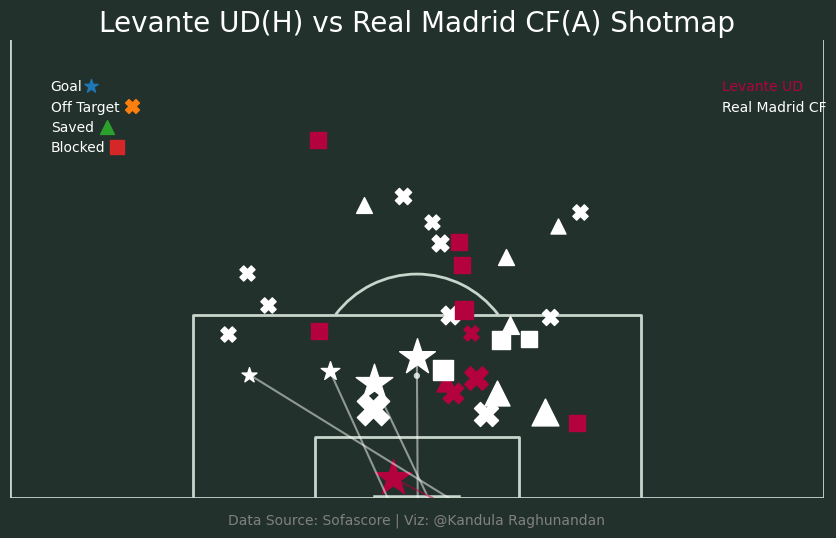

In [217]:
fig, ax=plt.subplots(figsize=(10.5,7))
fig.set_facecolor("#22312b")
ax.patch.set_facecolor("#22312b")

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc',half=True)
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False)
plt.gca().invert_yaxis()

ax.set_xlim(0,80)
ax.set_ylim(0,45)

for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==True):
        if df["shotType"][x]=="save":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#B3023D",s=df["xg"][x]*800+100,marker="^")
        if ((df["shotType"][x]=="miss") | (df["shotType"][x]=="post")):
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#B3023D",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#B3023D",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#B3023D",s=df["xg"][x]*800+100,marker="*")
            plt.plot((df["playerCoordinates.y"][x],df["goalMouthCoordinates.y"][x]),(df["playerCoordinates.x"][x],df["goalMouthCoordinates.x"][x]),color="#B3023D",alpha=0.5)
    if (df["isHome"][x]==False):
        if df["shotType"][x]=="save":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="^")
        if ((df["shotType"][x]=="miss") | (df["shotType"][x]=="post")):
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#FFFFFF",s=df["xg"][x]*800+100,marker="*")
            plt.plot((df["playerCoordinates.y"][x],df["goalMouthCoordinates.y"][x]),(df["playerCoordinates.x"][x],df["goalMouthCoordinates.x"][x]),color="#FFFFFF",alpha=0.5)
    
plt.title("Levante UD(H) vs Real Madrid CF(A) Shotmap",color="white",size="20")
#ax.set_title("Score: 1-4",color="w")
ax.text(4,40,"Goal",c="white")
ax.scatter(8,40.5,marker="*",s=100)
ax.text(4,38,"Off Target",color="white")
ax.scatter(12,38.5,marker="X",s=100)
ax.text(4,36,"Saved",color="white")
ax.scatter(9.5,36.5,marker="^",s=100)
ax.text(4,34,"Blocked",color="white")
ax.scatter(10.5,34.5,marker="s",s=100)

ax.text(70,40,"Levante UD",c="#B3023D")
ax.text(70,38,"Real Madrid CF",c="#FFFFFF")


plt.text(
    0.5, -0.05, "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

#plt.savefig("C:/Users/K Raghunandan/Analyst/Results/Barcelona vs Valencia 2025.png")#B3023D